# Explore here

In [42]:
# Your code here

# Paso 1: Carga del conjunto de datos

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

data.head(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
X = data[["Latitude", "Longitude", "MedInc" ]]

X.shape

(20640, 3)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()
X_train.shape

(16512, 3)

In [45]:
# Paso 2: Construye un K-Means
from sklearn.cluster import KMeans


model_kmeans = KMeans(n_clusters=6 ,random_state = 42, n_init="auto")

model_kmeans.fit(X_train)


KMeans(n_clusters=6, random_state=42)

In [46]:

y_train = list(model_kmeans.labels_)
X_train["Cluster"] = y_train
X_train = X_train[["Latitude", "Longitude", "MedInc", "Cluster" ]]
X_train.head()



,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


<Axes: xlabel='MedInc', ylabel='Longitude'>

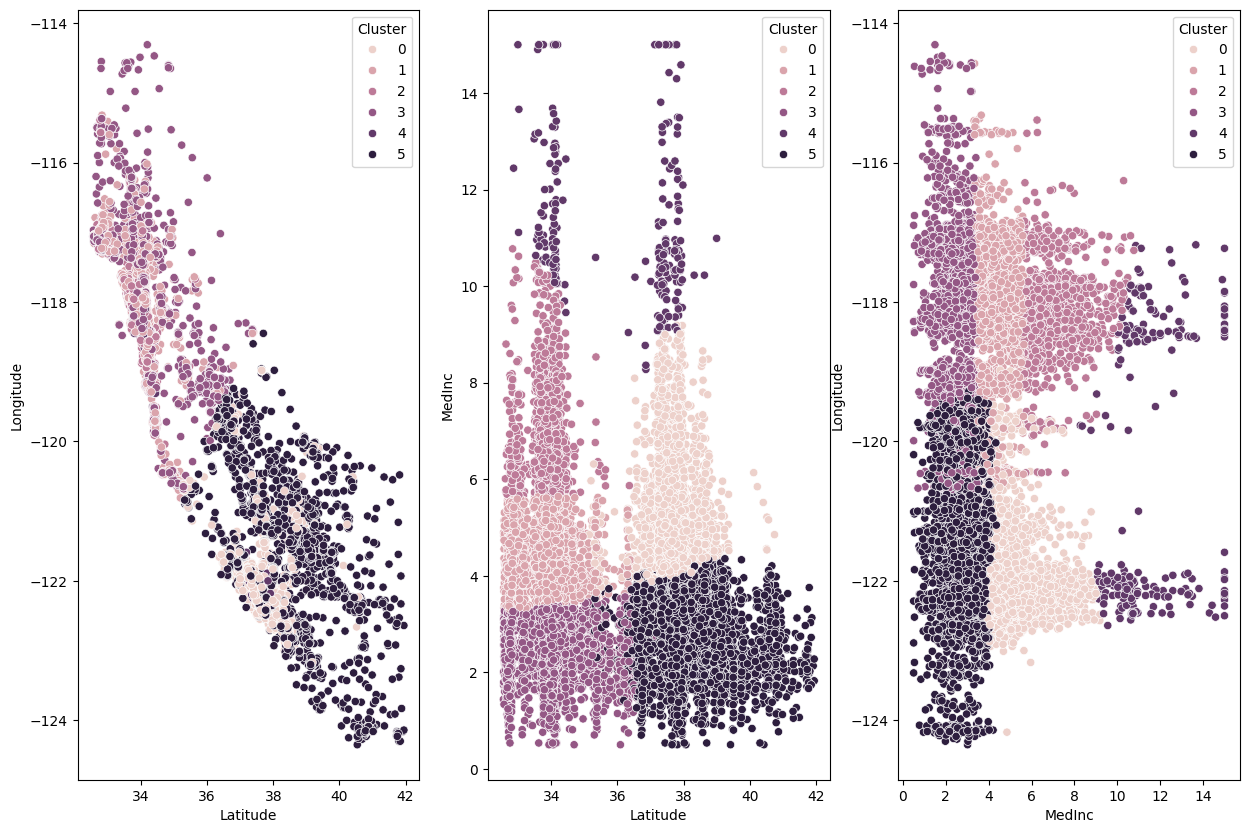

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 10))

sns.scatterplot(ax = axis[0], data=X_train, x="Latitude", y="Longitude", hue="Cluster")
sns.scatterplot(ax = axis[1], data=X_train, x="Latitude", y="MedInc", hue="Cluster")
sns.scatterplot(ax = axis[2], data=X_train, x="MedInc", y="Longitude", hue="Cluster")



In [53]:
# Paso 3: Predice con el conjunto de test

y_test = list(model_kmeans.predict(X_test))
X_test["Cluster"] = y_test
X_test.head()

,Latitude,Longitude,MedInc,Cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


<Axes: xlabel='MedInc', ylabel='Longitude'>

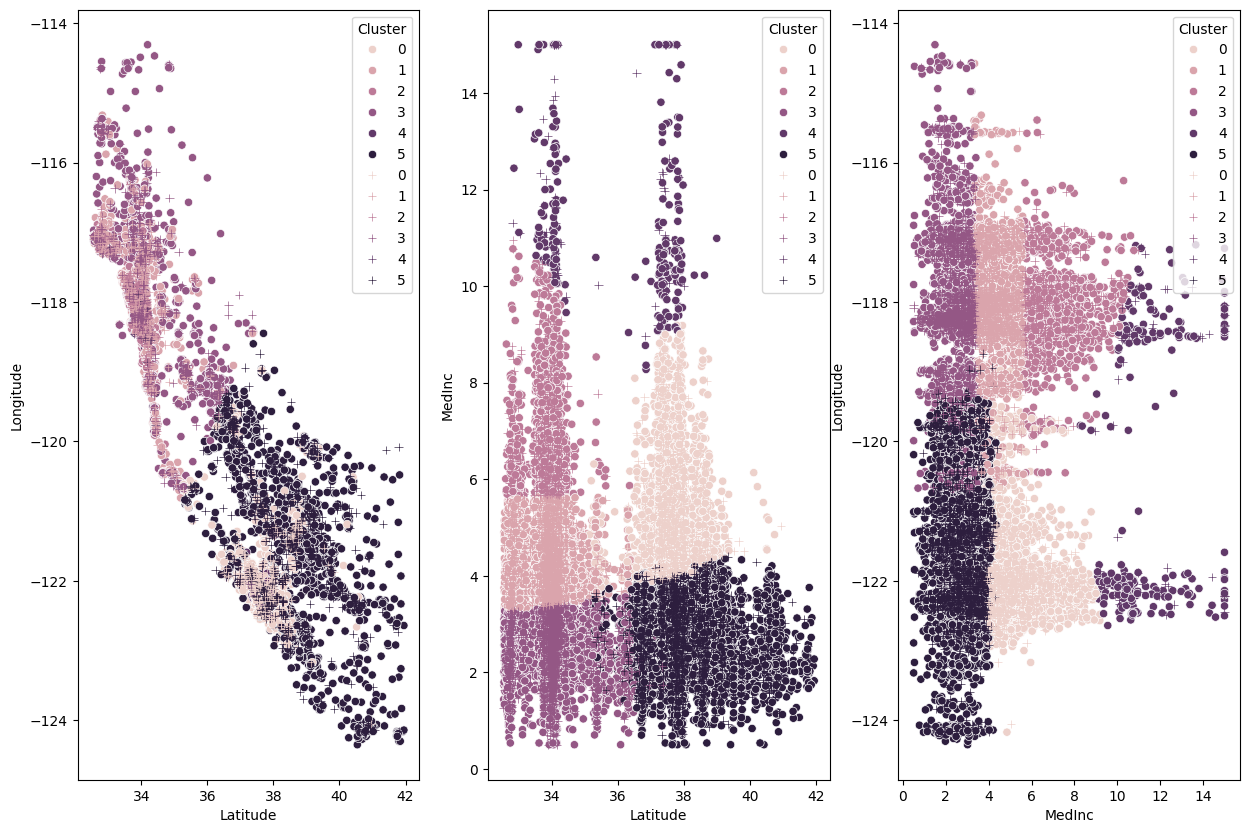

In [54]:
fig, axis = plt.subplots(1, 3, figsize = (15, 10))

sns.scatterplot(ax = axis[0], data=X_train, x="Latitude", y="Longitude", hue="Cluster")
sns.scatterplot(ax = axis[1], data=X_train, x="Latitude", y="MedInc", hue="Cluster")
sns.scatterplot(ax = axis[2], data=X_train, x="MedInc", y="Longitude", hue="Cluster")

sns.scatterplot(ax = axis[0], data=X_test, x="Latitude", y="Longitude", hue="Cluster", marker="+")
sns.scatterplot(ax = axis[1], data=X_test, x="Latitude", y="MedInc", hue="Cluster", marker="+")
sns.scatterplot(ax = axis[2], data=X_test, x="MedInc", y="Longitude", hue="Cluster", marker="+")